# Polynomial Regression with Lasso Regularization
This notebook demonstrates polynomial regression using a simple example of fitting a parabola to data. Lasso regularization is then applied to prevent overfitting.

## How Polynomial Regression Works

Polynomial regression is an extension of linear regression that models the relationship between the independent variable (X) and the dependent variable (y) as an nth-degree polynomial. It is particularly useful when the data exhibits a non-linear relationship.

### Key Concepts:
1. **Polynomial Features**:
   - In polynomial regression, the independent variable is transformed into polynomial features. For example, for a degree-2 polynomial, the features become $X, X^2$.

2. **Model Equation**:
   - The model predicts $y$ using the equation:
     $$
     y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_n X^n
     $$
     where $\beta_0, \beta_1, \dots, \beta_n$ are the coefficients of the polynomial.

3. **Fitting the Model**:
   - The model is trained by minimizing the Residual Sum of Squares (RSS) between the predicted and actual values.

4. **Advantages**:
   - Captures non-linear relationships in the data.

5. **Disadvantages**:
   - Prone to overfitting, especially with high-degree polynomials.
   - Sensitive to outliers.

Polynomial regression is a powerful tool for modeling non-linear trends, but it requires careful selection of the polynomial degree to balance bias and variance.

## 1. Import Required Libraries
We will use libraries such as `numpy`, `matplotlib`, and `sklearn` for data generation, visualization, and modeling.

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

## 2. Generate Synthetic Data
We will generate data points that approximately follow a parabolic trend with added noise.

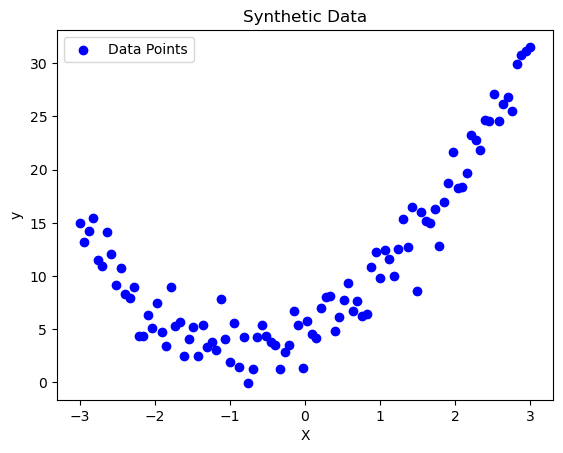

In [3]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Features
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)  # Target with noise

# Visualize the data
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

## 3. Fit a Polynomial Regression Model
We will fit a polynomial regression model to the data without regularization.

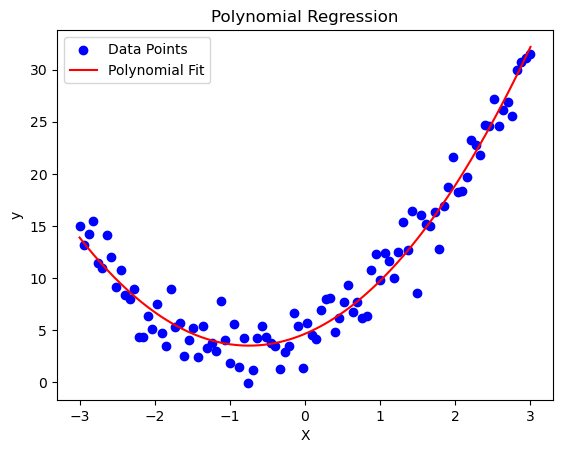

Coefficients: [[3.04597756 2.04072352]]
Intercept: [4.66766832]


In [4]:
# Fit a polynomial regression model
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
model = make_pipeline(polynomial_features, linear_regression)
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Visualize the fitted curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Print model coefficients
print("Coefficients:", model.named_steps['linearregression'].coef_)
print("Intercept:", model.named_steps['linearregression'].intercept_)

## 5. Evaluate the Models
We will compare the performance of the models using Mean Squared Error (MSE).

In [6]:
# Calculate Mean Squared Error for both models
mse_no_regularization = mean_squared_error(y, y_pred)
mse_with_lasso = mean_squared_error(y, y_pred_lasso)

print(f"MSE without Regularization: {mse_no_regularization}")
print(f"MSE with Lasso Regularization: {mse_with_lasso}")

MSE without Regularization: 3.247194750188662
MSE with Lasso Regularization: 3.251796905407186


## 6. Effect of Overfitting
We will demonstrate overfitting by fitting a high-degree polynomial regression model to the data.

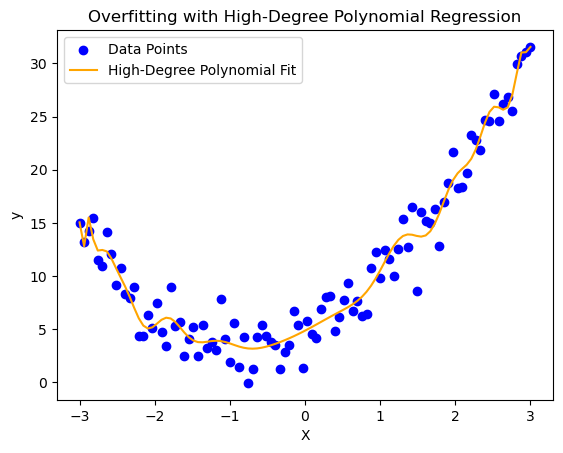

High-Degree Polynomial Coefficients: [[ 3.69127791e+00  1.17031654e+00 -1.18240433e+00 -2.17569377e+00
  -4.32313231e-01  4.05010605e+00  2.17624274e+00  2.67130580e+00
  -6.83871493e-01 -3.90350487e+00  6.46424666e-01 -2.50358356e+00
  -1.93916835e+00  5.42869428e+00  1.80107154e+00 -3.53719404e+00
  -8.44129445e-01  1.28769611e+00  2.36464854e-01 -2.98070351e-01
  -4.21864610e-02  4.57421847e-02  4.85480840e-03 -4.65737863e-03
  -3.49976666e-04  3.03344648e-04  1.44043176e-05 -1.14654394e-05
  -2.58668201e-07  1.91564220e-07]]


In [ ]:
# Fit a high-degree polynomial regression model (degree=30)
high_degree_polynomial_features = PolynomialFeatures(degree=30, include_bias=False)
high_degree_model = make_pipeline(high_degree_polynomial_features, linear_regression)
high_degree_model.fit(X, y)

# Predict values
y_pred_high_degree = high_degree_model.predict(X)

# Visualize the overfitted curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_high_degree, color='orange', label='High-Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting with High-Degree Polynomial Regression')
plt.legend()
plt.show()

# Print model coefficients
print("High-Degree Polynomial Coefficients:", high_degree_model.named_steps['linearregression'].coef_)

## 7. Using Lasso to Combat Overfitting
We will apply Lasso regularization to the high-degree polynomial regression model to prevent overfitting.

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+02, tolerance: 6.284e-01
  model = cd_fast.enet_coordinate_descent(


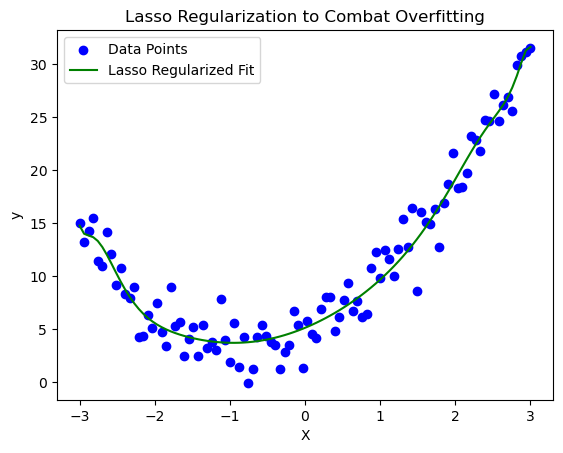

High-Degree Polynomial Coefficients with Lasso: [ 2.93894267e+00  1.48372418e+00  0.00000000e+00  8.05548632e-02
  3.17476376e-02 -0.00000000e+00  7.75011070e-03 -3.16007471e-04
 -1.68937476e-03  1.07464760e-04 -1.33484002e-04 -1.88575254e-06
 -3.01195159e-06 -1.14463984e-06  6.99801482e-07 -9.23922058e-08
  1.34870537e-07 -1.87756172e-09  1.55023144e-08  5.56560982e-10
  1.32246297e-09  9.93194745e-11  7.26638671e-11  9.81800929e-12
 -1.69630286e-12  5.06436343e-13 -1.30713171e-12 -3.72234630e-14
 -2.63911042e-13 -1.55263538e-14]


In [9]:
# Fit a high-degree polynomial regression model with Lasso regularization
lasso_high_degree = Lasso(alpha=0.1, max_iter=10000)
high_degree_model_lasso = make_pipeline(high_degree_polynomial_features, lasso_high_degree)
high_degree_model_lasso.fit(X, y)

# Predict values
y_pred_high_degree_lasso = high_degree_model_lasso.predict(X)

# Visualize the Lasso-regularized curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_high_degree_lasso, color='green', label='Lasso Regularized Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regularization to Combat Overfitting')
plt.legend()
plt.show()

# Print model coefficients
print("High-Degree Polynomial Coefficients with Lasso:", high_degree_model_lasso.named_steps['lasso'].coef_)

Overfitting occurs in high-degree polynomial fitting because the model becomes overly complex and starts to capture not only the underlying trend in the data but also the noise. This happens because:

1. **High Flexibility**: A high-degree polynomial has many parameters (coefficients) that allow it to fit the training data very closely, including random variations or noise.
2. **Poor Generalization**: While the model fits the training data well, it fails to generalize to unseen data, leading to poor performance on test data.
3. **Variance Dominance**: High-degree models are sensitive to small changes in the data, resulting in high variance and unstable predictions.

### How Lasso Fights Overfitting
Lasso (Least Absolute Shrinkage and Selection Operator) combats overfitting by adding a regularization term to the loss function, which penalizes large coefficients. Here's how it works:

1. **Regularization Term**: Lasso minimizes the following objective function:
    $$
    \text{Loss} = \text{RSS} + \alpha \sum_{j=1}^p |\beta_j|
    $$
    - **RSS**: Residual Sum of Squares, which measures the error between predicted and actual values.
    - **$\alpha$**: Regularization parameter that controls the strength of the penalty.
    - **$|\beta_j|$**: Absolute value of the coefficients.

2. **Coefficient Shrinkage**: The Lasso penalty forces the coefficients of less important features to shrink toward zero. This reduces the model's complexity and prevents it from fitting the noise in the data.

3. **Feature Selection**: Lasso can set some coefficients exactly to zero, effectively removing irrelevant features. This simplifies the model and reduces the risk of overfitting.

4. **Bias-Variance Tradeoff**: By penalizing large coefficients, Lasso introduces some bias into the model but significantly reduces variance, leading to better generalization on unseen data.

In summary, Lasso regularization prevents overfitting by simplifying the model, reducing its sensitivity to noise, and improving its ability to generalize to new data.